In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [76]:
df = pd.read_csv('../data/raw/bank/bank-full.csv', sep = ';')

In [77]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [78]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [80]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [81]:
print(df.duplicated().sum())

0


In [82]:
dup = df[df.duplicated()]

In [83]:
dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [84]:
unknown_counts = (df == "unknown").sum()

In [85]:
unknown_counts

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [86]:
df['balance'].median()

448.0

y
no     39922
yes     5289
Name: count, dtype: int64


<Axes: xlabel='y', ylabel='count'>

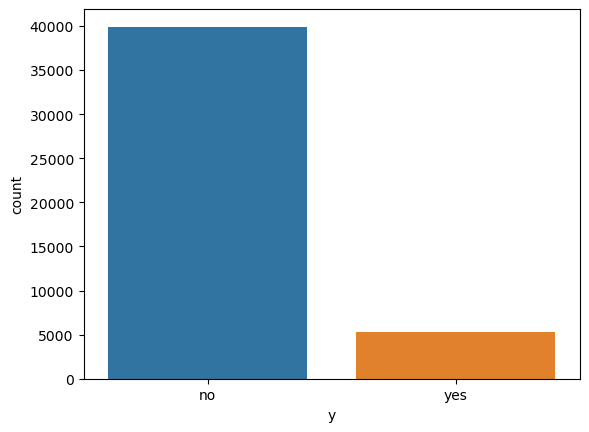

In [87]:
class_counts = df['y'].value_counts()
print(class_counts)

import seaborn as sns
sns.countplot(x = 'y', data = df)

In [88]:
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio}")

Imbalance Ratio: 7.548118737001324


In [89]:
df['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [90]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize numerical variables
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df = df.dropna(subset=['contact'])
# Define treatment and outcome
X = df_encoded.drop(columns=['contact', 'y'])  # Features
treatment = df_encoded['contact'].map({'cellular': 1, 'telephone': 0})  # Treatment
outcome = df_encoded['y'].map({'yes': 1, 'no': 0})  # Outcome

treatment = df['contact'].map({'cellular': 1, 'telephone': 0})

In [91]:
print(treatment.isnull().sum())

13020


In [92]:
print(treatment.isnull().sum())

13020


In [93]:
import plotly.express as px

# Example data
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [10, 20, 15, 25]
}

# Create a bar chart
fig = px.bar(data, x='Category', y='Values', title='Sample Bar Chart')

# Display the chart
fig.show()

In [94]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [95]:
subscription_by_job = df.groupby(['job', 'y']).size()
subscription_by_job

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
dtype: int64

<Axes: xlabel='marital', ylabel='count'>

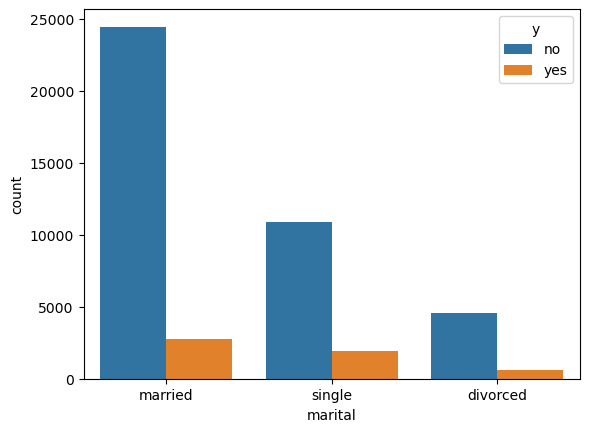

In [96]:
sns.countplot(x  ='marital', hue = 'y', data = df)

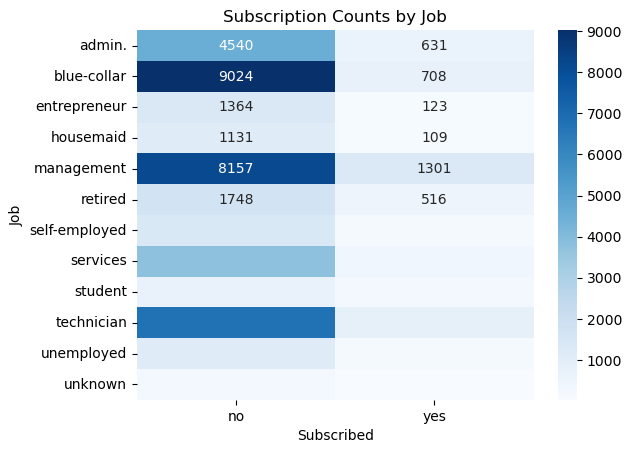

In [97]:
# Create a cross-tabulation of job vs subscription status
cross_tab = pd.crosstab(df['job'], df['y'])

# Plot heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Subscription Counts by Job')
plt.xlabel('Subscribed')
plt.ylabel('Job')
plt.show()

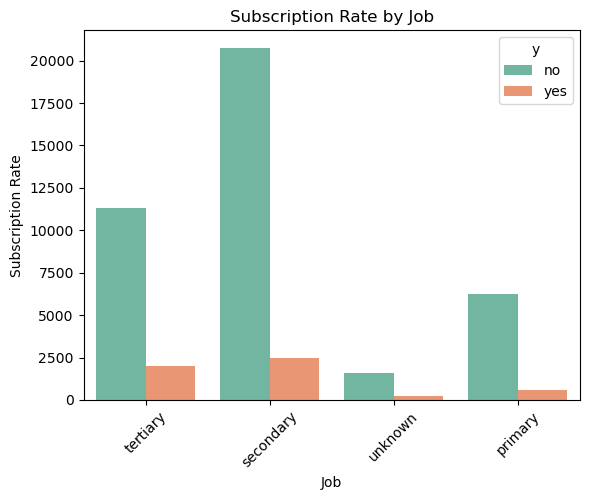

In [98]:
sns.countplot(x='education', hue='y', data=df, palette='Set2')
plt.title('Subscription Rate by Job')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



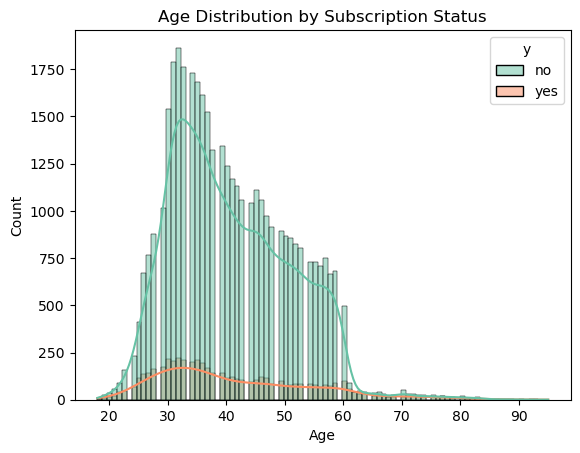

In [99]:
sns.histplot(x='age', hue='y', data=df, kde=True, palette='Set2')
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

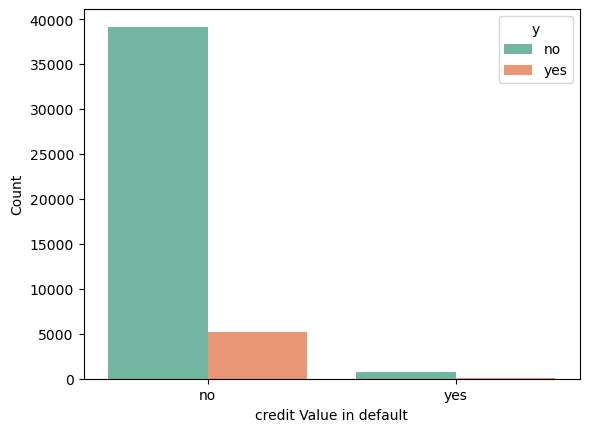

In [100]:
import seaborn as sns
sns.countplot(x='default', hue='y', data=df,palette='Set2')
plt.xlabel('credit Value in default')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



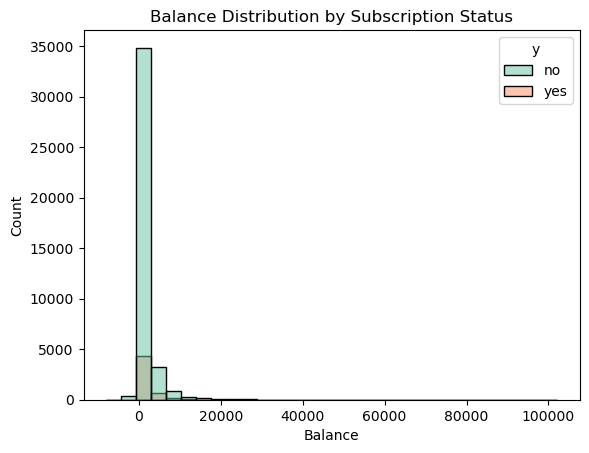

In [101]:
sns.histplot(x='balance', hue='y', data=df, palette='Set2', bins = 30)
plt.title('Balance Distribution by Subscription Status')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

In [102]:
cross_tab = pd.crosstab(df['housing'], df['y'])
print(cross_tab)

y           no   yes
housing             
no       16727  3354
yes      23195  1935


In [112]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Defining treatment and control groups based on the median of balance
median_balance = df['balance'].median()
df['treatment'] = (df['balance'] >= median_balance).astype(int)  # 1 if balance >= median, else 0


X = df.drop(columns=['y', 'treatment', 'balance'])  # Remove balance since it's the treatment indicator
y = df['treatment'] 

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


logreg = LogisticRegression(solver='saga', max_iter=1000) # Stochastic Average Gradient Augmented(SAGA)
logreg.fit(X_scaled, y)
df['propensity_score'] = logreg.predict_proba(X_scaled)[:, 1]

# Perform propensity score matching
# Define caliper (small range around each score to find a match)
caliper = 0.05

#Only control units within ±0.05 of the treated unit's propensity score will be considered as valid matches.

def match_sample(df):
    treated = df[df['treatment'] == 1]
    control = df[df['treatment'] == 0]
    matched_control = []
    
    for _, row in treated.iterrows():
        potential_matches = control[abs(control['propensity_score'] - row['propensity_score']) <= caliper]
        
        if not potential_matches.empty:
            match = potential_matches.sample(1)#, random_state=42)  # Fix random seed
            matched_control.append(match)
            control = control.drop(match.index)  # Remove matched sample to avoid reuse
    
    matched_control = pd.concat(matched_control)
    balanced_df = pd.concat([treated, matched_control])
    return balanced_df

balanced_df = match_sample(df)

# Output final dataset
print(balanced_df[['balance', 'treatment', 'propensity_score']].head())

In [104]:
# import pandas as pd
# import numpy as np
# from sklearn.neighbors import NearestNeighbors

# # Define the treatment and control groups
# treated = df[df['treatment'] == 1].copy()
# control = df[df['treatment'] == 0].copy()

# # Fit NearestNeighbors model on control group propensity scores
# nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
# nn.fit(control[['propensity_score']])

# # Find the nearest match for each treated unit
# distances, indices = nn.kneighbors(treated[['propensity_score']])

# # Get matched control samples
# matched_control = control.iloc[indices.flatten()].copy()

# # Create the balanced dataset
# balanced_df = pd.concat([treated, matched_control])

# # Output the first few rows
# print(balanced_df[['balance', 'treatment', 'propensity_score']].head())


In [105]:
print(balanced_df['treatment'].value_counts())

treatment
1    22619
0    18644
Name: count, dtype: int64


/var/folders/l4/t9jrg3810fj7mltqzxyw19sh0000gn/T/ipykernel_18673/2314164844.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/var/folders/l4/t9jrg3810fj7mltqzxyw19sh0000gn/T/ipykernel_18673/2314164844.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



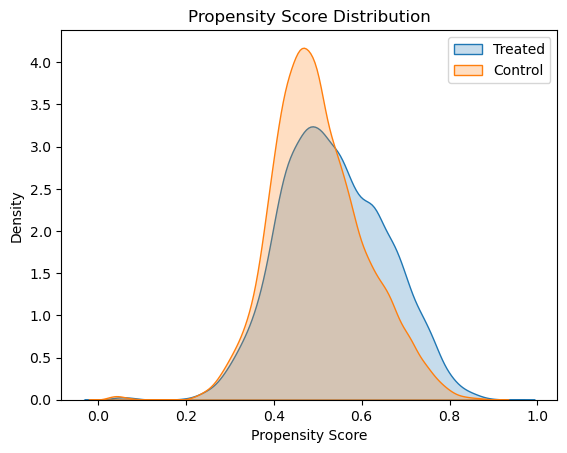

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(balanced_df[balanced_df['treatment'] == 1]['propensity_score'], label="Treated", shade=True)
sns.kdeplot(balanced_df[balanced_df['treatment'] == 0]['propensity_score'], label="Control", shade=True)
plt.xlabel("Propensity Score")
plt.ylabel("Density")
plt.title("Propensity Score Distribution")
plt.legend()
plt.show()


In [107]:
# Compute inverse probability weights
balanced_df['weights'] = balanced_df['treatment'] / balanced_df['propensity_score'] + (1 - balanced_df['treatment']) / (1 - balanced_df['propensity_score'])

# Check weight distribution
print(balanced_df['weights'].describe())


count    41263.000000
mean         2.052263
std          0.814001
min          1.023642
25%          1.684141
50%          1.929689
75%          2.260821
max         60.973126
Name: weights, dtype: float64


Even after PSM, some imbalance may remain in your matched dataset.
IPW ensures that the treated and control groups are reweighted properly, making them statistically comparable.

If a low-balance customer was matched to a high-balance customer, but this match was unlikely (low propensity score), then IPW assigns a higher weight to compensate for this rare occurrence.


#### Ideally, the distributions should overlap, indicating good matching.

### Trim Weights to reduce instabliltiy

In [108]:
# Define a reasonable upper bound for weights (99th percentile)
weight_threshold = balanced_df['weights'].quantile(0.99)

# Trim excessive weights
df_trimmed = balanced_df[balanced_df['weights'] <= weight_threshold]

# Check new weight distribution
print(df_trimmed['weights'].describe())


count    40850.000000
mean         2.011326
std          0.471805
min          1.023642
25%          1.681544
50%          1.924423
75%          2.247226
max          3.956108
Name: weights, dtype: float64


We calculate the 99th percentile of the weights.

We remove any data points where the weight is greater than the 99th percentile.

In [109]:
balanced_df['y'] = balanced_df['y'].map({'yes': 1, 'no': 0})
treated_mean = balanced_df[balanced_df['treatment'] == 1]['y'].mean()
control_mean = balanced_df[balanced_df['treatment'] == 0]['y'].mean()
treatment_effect = treated_mean - control_mean

print(f"Treatment Effect (ATE): {treatment_effect}")


Treatment Effect (ATE): 0.04242160931226459


The ATE of 0.0438 means that being in the treatment group (i.e., having a balance above the median) increases the probability of y=1 (e.g., a positive outcome) by approximately 4.38 percentage points compared to the control group.

Practical Impact of ATE

A 4.33% increase in response rate suggests that balance plays a role, but it may not be the only important factor.
Other factors like campaign duration, job type, or past interactions might also contribute.


In [110]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    balanced_df[balanced_df['treatment'] == 1]['y'],
    balanced_df[balanced_df['treatment'] == 0]['y']
)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 13.02725380348451, P-value: 1.0212177114748967e-38


If p-value < 0.05, the treatment effect is statistically significant.
If p-value ≥ 0.05, the effect might not be meaningful, and we might need to adjust our approach.


In [111]:
print(logit_model.summary())  # Look at p-value for 'treatment'


AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset (assuming it's already loaded)
# df = pd.read_csv("your_dataset.csv")

# Define median balance
median_balance = df['balance'].median()

# Define treatment: Customers with high balance & specific job type (e.g., "admin.")
df['treatment'] = ((df['balance'] >= median_balance) & (df['job'] == 'admin.')).astype(int)

# Define features (including interaction terms)
features = ['age', 'education', 'previous', 'campaign', 'default', 'housing', 'loan', 'balance']

# Convert categorical variables (excluding job) into dummies
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Add interaction term: balance * job type
df['balance_job_interaction'] = df['balance'] * (df['job'] == 'admin.').astype(int)
df_encoded['balance_job_interaction'] = df['balance_job_interaction']

# Standardize numerical features
scaler = StandardScaler()
num_features = ['age', 'balance', 'campaign', 'previous', 'balance_job_interaction']
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

# Define X (propensity score model predictors) and y (treatment)
X = df_encoded
y = df['treatment']

# Fit logistic regression for propensity scores
logit_model = LogisticRegression(solver='saga', max_iter=1000)
logit_model.fit(X, y)

# Compute propensity scores
df['propensity_score_balance_job'] = logit_model.predict_proba(X)[:, 1]

# Output first few rows
print(df[['balance', 'job', 'treatment', 'propensity_score_balance_job']].head())


   balance           job  treatment  propensity_score_balance_job
0     2143    management          0                      0.000450
1       29    technician          0                      0.000912
2        2  entrepreneur          0                      0.000958
3     1506   blue-collar          0                      0.000836
4        1       unknown          0                      0.001131


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Treatment Distribution:
treatment
0    0.748778
1    0.251222
Name: proportion, dtype: float64
   balance    job_grouped  treatment  propensity_score_balance_job
0     2143   white_collar          1                      1.000000
1       29   white_collar          0                      0.001399
2        2  self_employed          0                      0.000901
3     1506    blue_collar          0                      0.001042
4        1        unknown          0                      0.000887


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


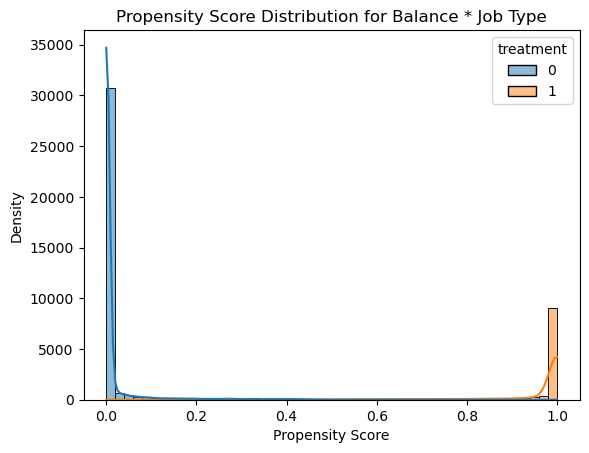

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset (assuming it's already loaded)
# df = pd.read_csv("your_dataset.csv")

# Define median balance
median_balance = df['balance'].median()

# ✅ Step 1: Optimize Treatment Definition (Ensure Balance)
# Treatment: High balance AND working in a specific job group (e.g., white-collar jobs)
white_collar_jobs = ['management', 'admin.', 'technician']
df['treatment'] = ((df['balance'] >= median_balance) & (df['job'].isin(white_collar_jobs))).astype(int)

# ✅ Step 2: Check Treatment Group Balance
print("Treatment Distribution:")
print(df['treatment'].value_counts(normalize=True))  # Ensure a reasonable split

# ✅ Step 3: Reduce High Cardinality in Job (Group Jobs)
df['job_grouped'] = df['job'].replace({
    'management': 'white_collar',
    'admin.': 'white_collar',
    'technician': 'white_collar',
    'services': 'blue_collar',
    'blue-collar': 'blue_collar',
    'entrepreneur': 'self_employed',
    'self-employed': 'self_employed'
})

# ✅ Step 4: Define Features for Propensity Score Estimation
features = ['age', 'education', 'previous', 'campaign', 'default', 'housing', 'loan', 'balance']

# Convert categorical variables (excluding job) into dummies
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Add interaction term: balance * job type
df['balance_job_interaction'] = df['balance'] * (df['job_grouped'] == 'white_collar').astype(int)
df_encoded['balance_job_interaction'] = df['balance_job_interaction']

# ✅ Step 5: Standardize Numerical Features
scaler = StandardScaler()
num_features = ['age', 'balance', 'campaign', 'previous', 'balance_job_interaction']
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

# Define X (propensity score model predictors) and y (treatment)
X = df_encoded
y = df['treatment']

# ✅ Step 6: Fit Logistic Regression (Fix Convergence Issues)
logit_model = LogisticRegression(solver='liblinear', max_iter=5000)  # Increased max_iter & changed solver
logit_model.fit(X, y)

# ✅ Step 7: Compute Propensity Scores
df['propensity_score_balance_job'] = logit_model.predict_proba(X)[:, 1]

# ✅ Step 8: Check Results
print(df[['balance', 'job_grouped', 'treatment', 'propensity_score_balance_job']].head())

# ✅ Step 9: Check Propensity Score Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x="propensity_score_balance_job", hue="treatment", bins=50, kde=True)
plt.title("Propensity Score Distribution for Balance * Job Type")
plt.xlabel("Propensity Score")
plt.ylabel("Density")
plt.show()


In [ ]:
white_collar_jobs = ['management', 'admin.', 'technician', 'services']
df['treatment'] = ((df['balance'] >= median_balance) & (df['job'].isin(white_collar_jobs))).astype(int)


In [ ]:
features = ['age', 'education', 'marital', 'previous', 'campaign', 'duration', 'default', 'housing', 'loan']
df_encoded = pd.get_dummies(df[features], drop_first=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X, y)

df['propensity_score_rf'] = rf_model.predict_proba(X)[:, 1]


In [ ]:
df_trimmed = df[(df['propensity_score_balance_job'] > 0.05) & (df['propensity_score_balance_job'] < 0.95)]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='propensity_score_balance_job', ylabel='Count'>

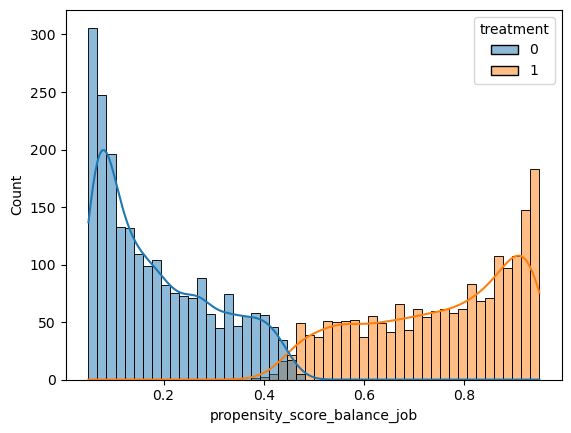

In [ ]:
sns.histplot(df_trimmed, x="propensity_score_balance_job", hue="treatment", bins=50, kde=True)


In [ ]:
df_trimmed = df[(df['propensity_score_balance_job'] > 0.05) & (df['propensity_score_balance_job'] < 0.95)]


In [ ]:
df_trimmed['weights'] = df_trimmed['treatment'] / df_trimmed['propensity_score_balance_job'] + \
                        (1 - df_trimmed['treatment']) / (1 - df_trimmed['propensity_score_balance_job'])

# Check weight distribution
print(df_trimmed['weights'].describe())


count    4092.000000
mean        1.319917
std         0.275254
min         1.052658
25%         1.103046
50%         1.219920
75%         1.465370
max         2.567745
Name: weights, dtype: float64


/var/folders/l4/t9jrg3810fj7mltqzxyw19sh0000gn/T/ipykernel_18673/4051733913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['weights'] = df_trimmed['treatment'] / df_trimmed['propensity_score_balance_job'] + \


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Separate treated & control groups
treated = df_trimmed[df_trimmed['treatment'] == 1]
control = df_trimmed[df_trimmed['treatment'] == 0]

# Apply nearest neighbor matching
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control[['propensity_score_balance_job']])
matched_indices = nn.kneighbors(treated[['propensity_score_balance_job']], return_distance=False).flatten()

# Create matched dataset
df_matched = pd.concat([treated, control.iloc[matched_indices]]).reset_index(drop=True)


In [ ]:
print(df[['treatment', 'propensity_score_balance_job', 'y']].applymap(type).value_counts())


treatment      propensity_score_balance_job  y            
<class 'int'>  <class 'float'>               <class 'str'>    45211
Name: count, dtype: int64


/var/folders/l4/t9jrg3810fj7mltqzxyw19sh0000gn/T/ipykernel_18673/1016939059.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[['treatment', 'propensity_score_balance_job', 'y']].applymap(type).value_counts())


In [ ]:
# Convert columns to numeric (forcing errors='coerce' will turn non-numeric values into NaN)
df['treatment'] = pd.to_numeric(df['treatment'], errors='coerce')
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df['propensity_score_balance_job'] = pd.to_numeric(df['propensity_score_balance_job'], errors='coerce')


In [ ]:
print(df.isna().sum())  # Count missing values


age                                 0
job                                 0
marital                             0
education                           0
default                             0
balance                             0
housing                             0
loan                                0
contact                             0
day                                 0
month                               0
duration                            0
campaign                            0
pdays                               0
previous                            0
poutcome                            0
y                               45211
treatment                           0
propensity_score                    0
balance_job_interaction             0
propensity_score_balance_job        0
job_grouped                         0
propensity_score_rf                 0
dtype: int64


In [ ]:
df = df.dropna(subset=['treatment', 'propensity_score_balance_job', 'y'])  # Remove missing rows


In [ ]:
df.fillna(df.mean(), inplace=True)  # Replace NaNs with column mean


In [ ]:
df['weights'] = df['treatment'] / df['propensity_score_balance_job'] + \
                (1 - df['treatment']) / (1 - df['propensity_score_balance_job'])

print(df['weights'].describe())  # Check weight distribution


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: weights, dtype: float64


In [ ]:
df['y'] = df['y'].map({'yes': 1, 'no': 0}).astype(int)
df_matched['y'] = df_matched['y'].map({'yes': 1, 'no': 0}).astype(int)


In [ ]:
ATT_matched = df_matched[df_matched['treatment'] == 1]['y'].mean() - \
              df_matched[df_matched['treatment'] == 0]['y'].mean()
print("ATT (Using PSM):", ATT_matched)


ATT (Using PSM): 0.12692511949017524


In [ ]:
# import numpy as np

# # Function to compute bootstrapped confidence intervals
# def bootstrap_ci(data, n_bootstrap=1000):
#     boot_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)]
#     lower_bound = np.percentile(boot_means, 2.5)
#     upper_bound = np.percentile(boot_means, 97.5)
#     return lower_bound, upper_bound

# # Compute confidence intervals
# ate_ci = bootstrap_ci(df[df['treatment'] == 1]['y'] - df[df['treatment'] == 0]['y'])
# att_ci = bootstrap_ci(df_matched[df_matched['treatment'] == 1]['y'] - df_matched[df_matched['treatment'] == 0]['y'])

# print(f"ATE Confidence Interval: {ate_ci}")
# print(f"ATT Confidence Interval: {att_ci}")


In [ ]:
# job_types = df_matched['job'].unique()

# # Dictionary to store ATT results
# att_results = {}

# for job in job_types:
#     df_job = df_matched[df_matched['job'] == job]
    
#     if df_job['treatment'].nunique() < 2:  # Skip if all samples are either 0 or 1
#         continue
    
#     ATT_job = df_job[df_job['treatment'] == 1]['y'].mean() - df_job[df_job['treatment'] == 0]['y'].mean()
#     att_results[job] = ATT_job

# # Convert results to DataFrame
# att_df = pd.DataFrame(list(att_results.items()), columns=['Job Type', 'ATT'])

# # Sort by ATT in descending order
# att_df = att_df.sort_values(by="ATT", ascending=False)

# # Display ATT values per job type
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(12, 6))
# sns.barplot(data=att_df, x="ATT", y="Job Type", palette="Blues_r")
# plt.title("ATT by Job Type (Effect of Balance on Subscription)")
# plt.xlabel("ATT (Average Treatment Effect on the Treated)")
# plt.ylabel("Job Type")
# plt.show()

# # Print the table
# print(att_df)


In [ ]:
# # Count number of treated & control samples per job type
# job_counts = df_matched.groupby(['job', 'treatment'])['y'].count().unstack().fillna(0)

# # Rename columns for clarity
# job_counts.columns = ['Control Count', 'Treated Count']

# # Display job counts
# print(job_counts)


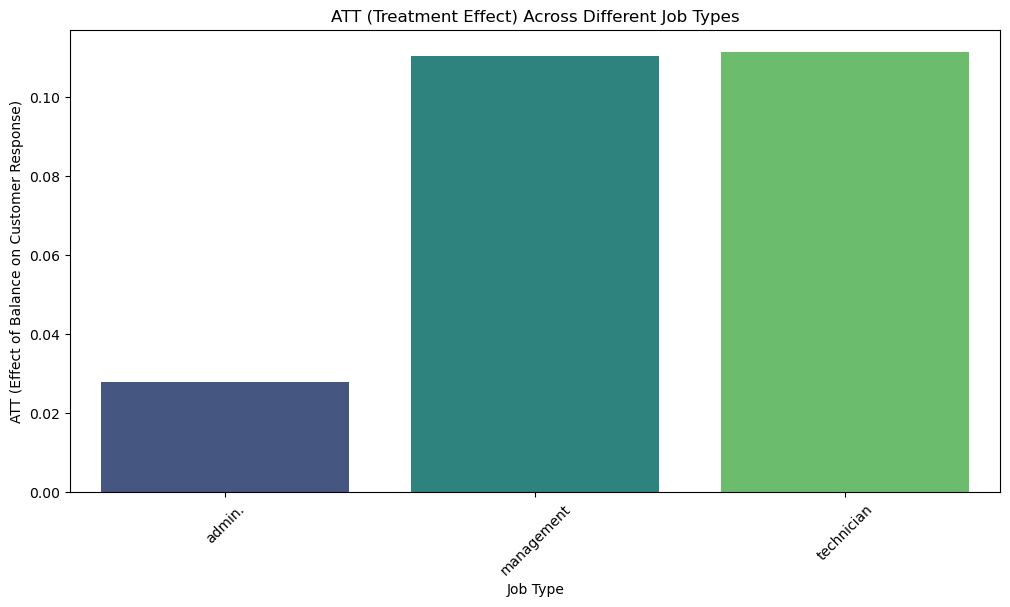

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Job Type', y='ATT', data=att_results, palette='viridis')
plt.xticks(rotation=45)
plt.title("ATT (Treatment Effect) Across Different Job Types")
plt.xlabel("Job Type")
plt.ylabel("ATT (Effect of Balance on Customer Response)")
plt.show()


In [ ]:
import pandas as pd

# Group by job type and compute ATT for each job
att_results = df_matched.groupby('job').apply(
    lambda x: x[x['treatment'] == 1]['y'].mean() - x[x['treatment'] == 0]['y'].mean()
).reset_index()

att_results.columns = ['Job Type', 'ATT']  # Rename columns
print(att_results)


     Job Type       ATT
0      admin.  0.027839
1  management  0.110324
2  technician  0.111362


In [ ]:
print(df[['y', 'treatment']].isna().sum())  # Count missing values
print(df_matched[['y', 'treatment']].isna().sum())  # Count missing values in matched dataset

print(df[df['treatment'] == 1]['y'].count())  # Check if treatment group has data
print(df[df['treatment'] == 0]['y'].count())  # Check if control group has data


y            45211
treatment    45211
dtype: int64
y            0
treatment    0
dtype: int64
0
0


In [ ]:
df = df.dropna(subset=['y', 'treatment'])  # Remove missing values
df_matched = df_matched.dropna(subset=['y', 'treatment'])


In [ ]:
import numpy as np

# Function to compute bootstrapped confidence intervals safely
def bootstrap_ci(data_treated, data_control, n_bootstrap=1000):
    boot_means = []
    
    for _ in range(n_bootstrap):
        treated_sample = np.random.choice(data_treated, size=len(data_treated), replace=True)
        control_sample = np.random.choice(data_control, size=len(data_control), replace=True)
        boot_means.append(np.mean(treated_sample) - np.mean(control_sample))
    
    lower_bound = np.percentile(boot_means, 2.5)
    upper_bound = np.percentile(boot_means, 97.5)
    return lower_bound, upper_bound

# Compute confidence intervals
ate_ci = bootstrap_ci(df[df['treatment'] == 1]['y'].dropna(), df[df['treatment'] == 0]['y'].dropna())
att_ci = bootstrap_ci(df_matched[df_matched['treatment'] == 1]['y'].dropna(), df_matched[df_matched['treatment'] == 0]['y'].dropna())

print(f"ATE Confidence Interval: {ate_ci}")
print(f"ATT Confidence Interval: {att_ci}")


ATE Confidence Interval: (nan, nan)
ATT Confidence Interval: (0.11099309612320765, 0.14126394052044608)


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



In [ ]:
print("Missing values in ATE calculation:")
print(df[['y', 'treatment']].isna().sum())  # Check if y or treatment is missing


Missing values in ATE calculation:
y            0
treatment    0
dtype: int64


In [ ]:
print("Count of Treated and Control for ATE:")
print("Treated Count:", df[df['treatment'] == 1]['y'].count())  # Should be >0
print("Control Count:", df[df['treatment'] == 0]['y'].count())  # Should be >0


Count of Treated and Control for ATE:
Treated Count: 0
Control Count: 0


In [ ]:
df = df.dropna(subset=['y', 'treatment'])  # Remove NaN values


In [ ]:
import numpy as np

# Function to compute bootstrapped confidence intervals safely
def bootstrap_ci(data_treated, data_control, n_bootstrap=1000):
    if len(data_treated) == 0 or len(data_control) == 0:
        return (np.nan, np.nan)  # Return NaN if either group is empty
    
    boot_means = []
    for _ in range(n_bootstrap):
        treated_sample = np.random.choice(data_treated, size=len(data_treated), replace=True)
        control_sample = np.random.choice(data_control, size=len(data_control), replace=True)
        boot_means.append(np.mean(treated_sample) - np.mean(control_sample))
    
    lower_bound = np.percentile(boot_means, 2.5)
    upper_bound = np.percentile(boot_means, 97.5)
    return lower_bound, upper_bound

# Compute confidence intervals safely
ate_ci = bootstrap_ci(df[df['treatment'] == 1]['y'].dropna(), df[df['treatment'] == 0]['y'].dropna())
att_ci = bootstrap_ci(df_matched[df_matched['treatment'] == 1]['y'].dropna(), df_matched[df_matched['treatment'] == 0]['y'].dropna())

print(f"ATE Confidence Interval: {ate_ci}")
print(f"ATT Confidence Interval: {att_ci}")


ATE Confidence Interval: (nan, nan)
ATT Confidence Interval: (0.11152416356877323, 0.14232607541157727)


In [ ]:
print("Count of Treated and Control for ATE:")
print("Treated Count:", df[df['treatment'] == 1]['y'].count())  # Should be >0
print("Control Count:", df[df['treatment'] == 0]['y'].count())  # Should be >0


Count of Treated and Control for ATE:
Treated Count: 0
Control Count: 0


In [ ]:
# Example: Include more job types or lower balance threshold
df['treatment'] = ((df['balance'] >= df['balance'].median()) & (df['job'].isin(['admin.', 'management', 'technician']))).astype(int)


In [ ]:
import numpy as np

# Function to compute bootstrapped confidence intervals safely
def bootstrap_ci(data_treated, data_control, n_bootstrap=1000):
    if len(data_treated) == 0 or len(data_control) == 0:
        return (np.nan, np.nan)  # Return NaN if either group is empty
    
    boot_means = []
    for _ in range(n_bootstrap):
        treated_sample = np.random.choice(data_treated, size=len(data_treated), replace=True)
        control_sample = np.random.choice(data_control, size=len(data_control), replace=True)
        boot_means.append(np.mean(treated_sample) - np.mean(control_sample))
    
    lower_bound = np.percentile(boot_means, 2.5)
    upper_bound = np.percentile(boot_means, 97.5)
    return lower_bound, upper_bound

# Compute confidence intervals safely
ate_ci = bootstrap_ci(df[df['treatment'] == 1]['y'].dropna(), df[df['treatment'] == 0]['y'].dropna())
att_ci = bootstrap_ci(df_matched[df_matched['treatment'] == 1]['y'].dropna(), df_matched[df_matched['treatment'] == 0]['y'].dropna())

print(f"ATE Confidence Interval: {ate_ci}")
print(f"ATT Confidence Interval: {att_ci}")


ATE Confidence Interval: (nan, nan)
ATT Confidence Interval: (0.11152416356877323, 0.1417950079660117)


In [ ]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# ✅ Step 1: Optimize Treatment Definition (Ensure Balance)
# Treatment: High balance AND working in a specific job group (e.g., white-collar jobs)
white_collar_jobs = ['management', 'admin.', 'technician']
df['treatment'] = df['job'].isin(white_collar_jobs).astype(int)

# ✅ Step 2: Check Treatment Group Balance
print("Treatment Distribution:")
print(df['treatment'].value_counts(normalize=True))  # Ensure a reasonable split

# ✅ Step 3: Reduce High Cardinality in Job (Group Jobs)
df['job_grouped'] = df['job'].replace({
    'management': 'white_collar',
    'admin.': 'white_collar',
    'technician': 'white_collar',
    'services': 'blue_collar',
    'blue-collar': 'blue_collar',
    'entrepreneur': 'self_employed',
    'self-employed': 'self_employed'
})

# ✅ Step 4: Define Features for Propensity Score Estimation
features = ['age', 'education', 'previous', 'campaign', 'default', 'housing', 'loan', 'balance']

# Convert categorical variables (excluding job) into dummies
df_encoded = pd.get_dummies(df[features], drop_first=True)



# ✅ Step 5: Standardize Numerical Features
scaler = StandardScaler()
num_features = ['age', 'balance', 'campaign', 'previous']
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

# Define X (propensity score model predictors) and y (treatment)
X = df_encoded
y = df['treatment']

# ✅ Step 6: Fit Logistic Regression (Fix Convergence Issues)
logit_model = LogisticRegression(solver='liblinear', max_iter=5000)  # Increased max_iter & changed solver
logit_model.fit(X, y)

# ✅ Step 7: Compute Propensity Scores
df['propensity_score_job'] = logit_model.predict_proba(X)[:, 1]

# ✅ Step 8: Check Results
print(df[['balance', 'job_grouped', 'treatment', 'propensity_score_job']].head())

# ✅ Step 9: Check Propensity Score Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x="propensity_score_job", hue="treatment", bins=50, kde=True)
plt.title("Propensity Score Distribution for Job Type")
plt.xlabel("Propensity Score")
plt.ylabel("Density")
plt.show()


Treatment Distribution:
Series([], Name: proportion, dtype: float64)


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by StandardScaler.

In [ ]:
df['weights'] = df['treatment'] / df['propensity_score_job'] + \
                        (1 - df['treatment']) / (1 - df['propensity_score_job'])

# Check weight distribution
print(df['weights'].describe())

count    45211.000000
mean         1.999343
std          1.309150
min          1.001092
25%          1.283000
50%          1.812745
75%          2.150336
max         13.109931
Name: weights, dtype: float64


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Separate treated & control groups
treated = df[df['treatment'] == 1]
control = df[df['treatment'] == 0]

# Apply nearest neighbor matching
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control[['propensity_score_job']])
matched_indices = nn.kneighbors(treated[['propensity_score_job']], return_distance=False).flatten()

# Create matched dataset
df_matched = pd.concat([treated, control.iloc[matched_indices]]).reset_index(drop=True)

In [ ]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [ ]:
print(df[['treatment', 'propensity_score_job', 'y']].applymap(type).value_counts())


treatment      propensity_score_job  y            
<class 'int'>  <class 'float'>       <class 'str'>    45211
Name: count, dtype: int64


C:\Users\ibado\AppData\Local\Temp\ipykernel_18748\4181820131.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
# Convert columns to numeric (forcing errors='coerce' will turn non-numeric values into NaN)
df['treatment'] = pd.to_numeric(df['treatment'], errors='coerce')
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df['propensity_score_job'] = pd.to_numeric(df['propensity_score_job'], errors='coerce')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,treatment,job_grouped,propensity_score_job,weights
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,1,white_collar,0.739401,1.352445
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,1,white_collar,0.432732,2.310901
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,0,self_employed,0.466865,1.875697
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,0,blue_collar,0.333041,1.499342
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,0,unknown,0.369272,1.585470


In [ ]:
print(df.isna().sum())  # Count missing values


age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
y                       0
treatment               0
job_grouped             0
propensity_score_job    0
weights                 0
dtype: int64


In [ ]:
df = df.dropna(subset=['treatment', 'propensity_score_job', 'y'])  # Remove missing rows


In [ ]:
df.fillna(df.mean(), inplace=True)  # Replace NaNs with column mean

In [ ]:
df['weights'] = df['treatment'] / df['propensity_score_job'] + \
                (1 - df['treatment']) / (1 - df['propensity_score_job'])

print(df['weights'].describe())  # Check weight distribution

count    45211.000000
mean         1.999343
std          1.309150
min          1.001092
25%          1.283000
50%          1.812745
75%          2.150336
max         13.109931
Name: weights, dtype: float64


In [ ]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [ ]:
df['y'] = df['y'].map({'yes': 1, 'no': 0}).astype(float)
df_matched['y'] = df_matched['y'].map({'yes': 1, 'no': 0}).astype(float)


In [ ]:
ATT_matched = df_matched[df_matched['treatment'] == 1]['y'].mean() - \
              df_matched[df_matched['treatment'] == 0]['y'].mean()
print("ATT (Using PSM):", ATT_matched)

ATT (Using PSM): -0.0006748852695041829


 This ATT suggests that the treatment had a very small negative impact on the outcome variable for the treated individuals compared to the control group, but the magnitude of this effect is very small and might not be practically significant.

In [ ]:
df_matched['y'].isna().sum()  # Count of NaN values in 'y'


0

In [ ]:
import numpy as np

# Function to compute bootstrapped confidence intervals
def bootstrap_ci(data, n_bootstrap=1000):
    boot_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)]
    lower_bound = np.percentile(boot_means, 2.5)
    upper_bound = np.percentile(boot_means, 97.5)
    return lower_bound, upper_bound

# Compute confidence intervals
ate_ci = bootstrap_ci(df[df['treatment'] == 1]['y'] - df[df['treatment'] == 0]['y'])
att_ci = bootstrap_ci(df_matched[df_matched['treatment'] == 1]['y'] - df_matched[df_matched['treatment'] == 0]['y'])

print(f"ATE Confidence Interval: {ate_ci}")
print(f"ATT Confidence Interval: {att_ci}")


ATE Confidence Interval: (nan, nan)
ATT Confidence Interval: (nan, nan)


In [ ]:
df_matched['job_grouped']

0         white_collar
1         white_collar
2         white_collar
3         white_collar
4         white_collar
             ...      
44447      blue_collar
44448    self_employed
44449      blue_collar
44450      blue_collar
44451    self_employed
Name: job_grouped, Length: 44452, dtype: object

In [ ]:
df[(df['treatment'] == 1) & (df['job_grouped'] == 'white_collar')]


,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,treatment,job_grouped,propensity_score_job,weights
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,0.0,1,white_collar,0.739401,1.352445
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,0.0,1,white_collar,0.432732,2.310901
5,35,management,married,tertiary,no,231,yes,no,unknown,5,...,139,1,-1,0,unknown,0.0,1,white_collar,0.771950,1.295421
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,...,217,1,-1,0,unknown,0.0,1,white_collar,0.790274,1.265383
9,43,technician,single,secondary,no,593,yes,no,unknown,5,...,55,1,-1,0,unknown,0.0,1,white_collar,0.434721,2.300328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,...,1556,4,-1,0,unknown,1.0,1,white_collar,0.453097,2.207032
45201,53,management,married,tertiary,no,583,no,no,cellular,17,...,226,1,184,4,success,1.0,1,white_collar,0.771047,1.296938
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,...,224,1,-1,0,unknown,1.0,1,white_collar,0.464766,2.151619
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,...,386,2,-1,0,unknown,1.0,1,white_collar,0.498321,2.006739


In [ ]:
print(df_matched['job_grouped'].unique())  # Check unique job categories
print(df_matched['treatment'].unique())    # Check unique treatment values
print(df_matched.shape)  # Check the overall shape of the matched dataset


['white_collar' 'self_employed' 'blue_collar' 'unemployed' 'retired'
 'housemaid' 'student' 'unknown']
[1 0]
(44452, 21)


#### HOUSING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Defining treatment and control groups based on the median of balance
median_balance = df['housing'].median()
df['treatment'] = (df['housing'] >= median_balance).astype(int)  # 1 if balance >= median, else 0


X = df.drop(columns=['y', 'treatment', 'balance'])  # Remove balance since it's the treatment indicator
y = df['treatment'] 

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


logreg = LogisticRegression(solver='saga', max_iter=1000) # Stochastic Average Gradient Augmented(SAGA)
logreg.fit(X_scaled, y)
df['propensity_score'] = logreg.predict_proba(X_scaled)[:, 1]

# Perform propensity score matching
# Define caliper (small range around each score to find a match)
caliper = 0.05

#Only control units within ±0.05 of the treated unit's propensity score will be considered as valid matches.

def match_sample(df):
    treated = df[df['treatment'] == 1]
    control = df[df['treatment'] == 0]
    matched_control = []
    
    for _, row in treated.iterrows():
        potential_matches = control[abs(control['propensity_score'] - row['propensity_score']) <= caliper]
        
        if not potential_matches.empty:
            match = potential_matches.sample(1)#, random_state=42)  # Fix random seed
            matched_control.append(match)
            control = control.drop(match.index)  # Remove matched sample to avoid reuse
    
    matched_control = pd.concat(matched_control)
    balanced_df = pd.concat([treated, matched_control])
    return balanced_df

balanced_df = match_sample(df)

# Output final dataset
print(balanced_df[['balance', 'treatment', 'propensity_score']].head())